In [3]:
!pip install networkx

  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyquil 3.5.0 requires lark<0.12.0,>=0.11.1, which is not installed.
pyquil 3.5.0 requires retry<0.10.0,>=0.9.2, which is not installed.
pyquil 3.5.0 requires scipy<2.0.0,>=1.6.1, which is not installed.
pyquil 3.5.0 requires types-python-dateutil<3.0.0,>=2.8.19, which is not installed.
pyquil 3.5.0 requires types-retry<0.10.0,>=0.9.9, which is not installed.
pyquil 3.5.0 requires networkx<3.0,>=2.5, but you have networkx 3.1 which is incompatible.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [5]:
n = 4  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)

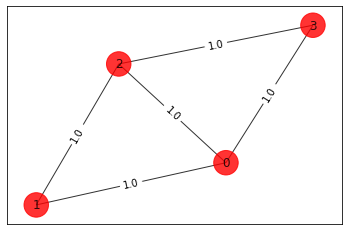

In [6]:
def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
    
draw_graph(G, colors, pos)

In [7]:
# Computing the weight matrix from the random graph
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = temp["weight"]
print(w)

[[0. 1. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]]


In [8]:
import perceval as pcvl
from perceval.components import PS, BS
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.rcdefaults()

In [10]:
num_modes = len(w)
print(num_modes)
input_state = pcvl.BasicState([1]*num_modes)

4


The relationship between the reflectivity R and theta is cosine(theta/2) = sqrt(R)

In [11]:
my_circuit1 = pcvl.Circuit(2)  # Creates circuit with 2 spatial modes
R = 0
my_circuit1.add((0,1), pcvl.BS(BS.r_to_theta(R)))
my_circuit1.describe()
pcvl.pdisplay(my_circuit1)

p = pcvl.Processor("Naive", my_circuit1)
states = {
    pcvl.BasicState([1, 0]): "0",
    pcvl.BasicState([0, 1]): "1",
}

ca = pcvl.algorithm.Analyzer(p, states)
ca.compute(expected={"0": "0", "1": "1"})
pcvl.pdisplay(ca)

,0,1
0,0,1
1,1,0
